# Exploratory Data Analysis

In [31]:
# biorxiv_medrxiv abstracts

import pandas as pd

data = pd.read_pickle('pickles/dtms/abstracts/biorxiv_medrxiv.pkl')
data = data.transpose()
data

paper_id,0015023cc06b5362d332b3baf348d11567ca2fbb,004f0f8bb66cf446678dc13cf2701feec4f36d76,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,01d162d7fae6aaba8e6e60e563ef4c2fca7b0e18,01e3b313e78a352593be2ff64927192af66619b5,02201e4601ab0eb70b6c26480cf2bfeae2625193,0255ea4b2f26a51a3bfa3bd8f3e1978c82c976d5,029c1c588047f1d612a219ee15494d2d19ff7439,03ce432f27c7df6af22b92245a614db2ecb5de5f,...,fe685aa676e739bd52ba2585a7e5b27c55e2d0d6,feb8807e8418fdd6c4b8816ea761c9a68767a407,fec0c97b9bdc012b76f082b8bcd6ba0efbb4f5c3,ff067164497bcfbd9145be223dcd2b05f159dd63,ff54e3e961a72eb1d2500166809b3651b2f98cf6,ff6bd29c8ecd325c4edddb2b050d5f4919db6112,ff6c0b549e3f20ec78845f981f19687eece4addf,ffbd7555a337706238c211197b221795e4e35146,ffbf8ea9948d73572fd052a74afa01b19e6758a3,ffc9bc4ac6548cb1c03c2c6f088ab1c1c2067c6f
aa,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
aaaaaac,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
aaed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aasec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aatode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zooprofilattico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zring,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zrlrggamc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Find the top 30 words said by each paper
top_dict = {}
for paper in data.columns:
    top = data[paper].sort_values(ascending=False).head(30)
    top_dict[paper]= list(zip(top.index, top.values))

In [33]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each paper
words = []
for paper in data.columns:
    top = [word for (word, count) in top_dict[paper]]
    for t in top:
        words.append(t)
        
#Counter(words).most_common()

In [34]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

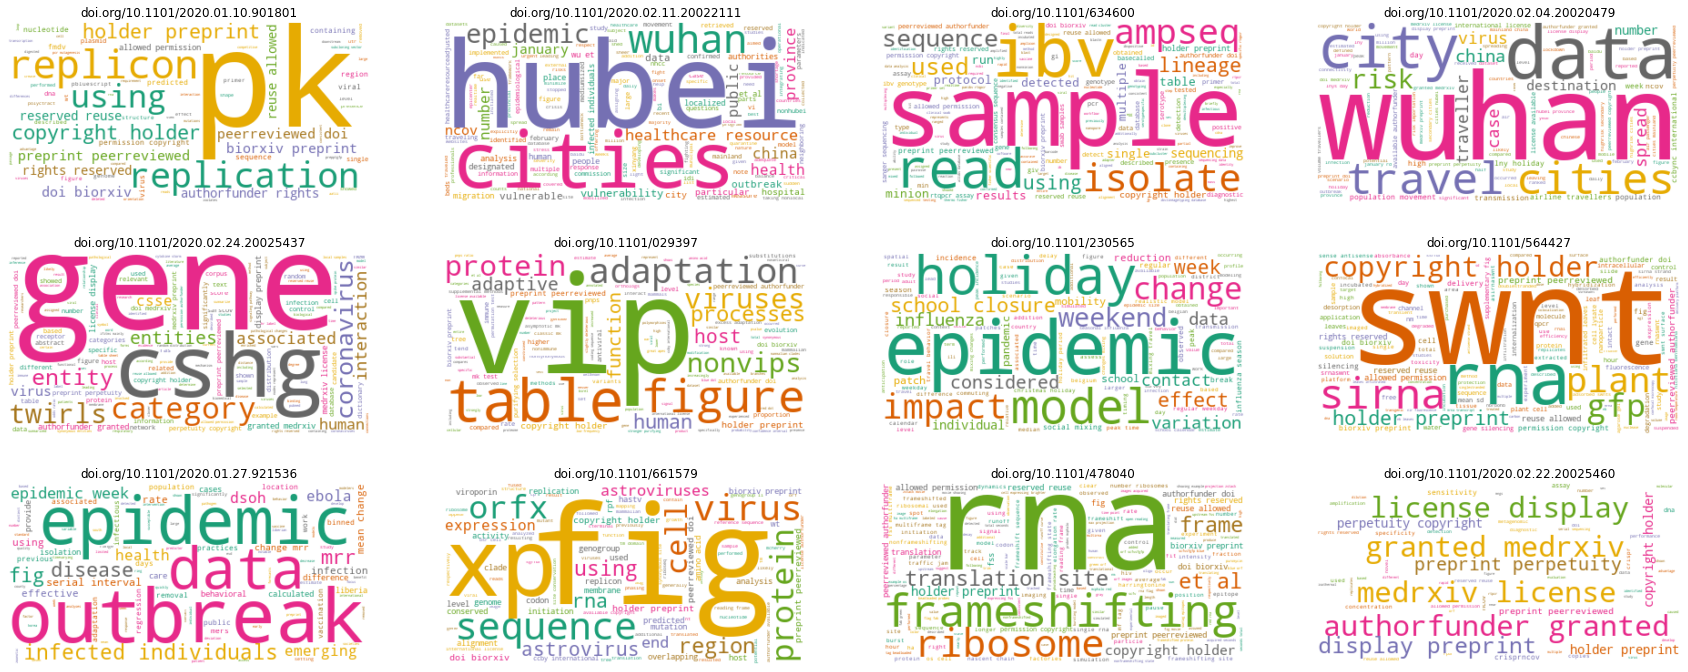

In [37]:
import matplotlib.pyplot as plt

data_clean = pd.read_pickle('pickles/corpus.pkl')

plt.rcParams['figure.figsize'] = [30, 12]

for index, paper in enumerate(data_clean.doi):
    if index == 12:
        break
    wc.generate(data_clean.body_text[index])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(paper)

plt.show()

In [38]:
data_clean['doi'][1]

'doi.org/10.1101/2020.02.11.20022111'

In [39]:
data_clean['title'][1]

'Healthcare-resource-adjusted vulnerabilities towards the 2019-nCoV epidemic across China'